# Pre-owned cars: A case study

   ### Dr. Ernesto Lee

### Importing necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import math
import matplotlib
import seaborn as sns

%matplotlib inline

### Reading the dataset

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/fenago/MLEssentials2/main/datasets/cars_sample.csv', sep=',', header=0, encoding='cp1252')
df.sample(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
2281,29/03/2016 21:49,Mercedes_Benz_Viano_2.0_CDI_2_Schiebetueren_St...,private,offer,10500,test,bus,2008,manual,116,viano,150000,10,diesel,mercedes_benz,no,29/03/2016 0:00,6132,06/04/2016 8:44
44031,21/03/2016 7:54,Bmw_e36_318i_TÜV_bis_Feb_2018,private,offer,760,control,limousine,1993,manual,113,3er,150000,5,NaN,bmw,yes,21/03/2016 0:00,10707,25/03/2016 4:19
43910,01/04/2016 13:37,Volkswagen_Golf_1.6_FSI_Trendline,private,offer,4500,test,limousine,2003,manual,116,golf,150000,11,petrol,volkswagen,no,01/04/2016 0:00,77656,05/04/2016 8:50
39526,06/03/2016 8:37,Ford_Focus_Gia,private,offer,2200,test,limousine,2000,manual,0,focus,150000,8,NaN,ford,no,06/03/2016 0:00,70193,11/03/2016 7:44
31704,17/03/2016 16:46,Volkswagen_Polo_GTI_Limited_Edition,private,offer,3700,test,small car,1999,manual,120,polo,150000,10,petrol,volkswagen,no,17/03/2016 0:00,4600,07/04/2016 1:44


In [4]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000000e+04,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,5.325941e+04,2004.494060,115.64740,125588.700000,5.741740,50911.446000
std,9.620356e+06,81.446313,177.38175,40217.039679,3.710105,25845.348279
min,0.000000e+00,1000.000000,0.00000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,70.00000,125000.000000,3.000000,30519.000000
50%,2.950000e+03,2003.000000,105.00000,150000.000000,6.000000,49632.000000
75%,7.300000e+03,2008.000000,150.00000,150000.000000,9.000000,71686.000000
max,2.147484e+09,9999.000000,16312.00000,150000.000000,12.000000,99998.000000


### Analyzing the categorical features

In [5]:
print(df['seller'].value_counts())
print(df['offerType'].value_counts())
print(df['abtest'].value_counts())
print(df['vehicleType'].value_counts())
print(df['gearbox'].value_counts())
print(df['model'].value_counts())
print(df['brand'].value_counts())
print(df['fuelType'].value_counts())
print(df['notRepairedDamage'].value_counts())
print(df['postalCode'].value_counts())

private    50000
Name: seller, dtype: int64
offer      49997
request        3
Name: offerType, dtype: int64
test       25827
control    24173
Name: abtest, dtype: int64
limousine        12925
small car        10723
station wagon     9080
bus               4042
cabrio            3026
coupe             2628
suv               2009
others             437
Name: vehicleType, dtype: int64
manual       36953
automatic    10384
Name: gearbox, dtype: int64
golf          4078
others        3409
3er           2828
polo          1772
corsa         1632
              ... 
samara           2
kalina           1
i3               1
elefantino       1
materia          1
Name: model, Length: 246, dtype: int64
volkswagen        10916
bmw                5496
opel               5269
mercedes_benz      4829
audi               4403
ford               3454
renault            2448
peugeot            1476
fiat               1288
seat                956
mazda               797
skoda               758
citroen      

### Dropping unnecessary columns and removing impermissible values

In [6]:
df.drop(['name','seller', 'offerType', 'dateCrawled',  'lastSeen'], axis='columns', inplace=True)

In [7]:
df=df[(df.price>=100) & (df.price<=200000) & (df.yearOfRegistration>=1950) & (df.yearOfRegistration<=2019) & (df.monthOfRegistration>0) & (df.monthOfRegistration<=12) & (df.powerPS>10) & (df.powerPS<1000)]
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,40666.000000,40666.000000,40666.000000,40666.000000,40666.000000,40666.000000
mean,6470.245930,2003.775045,127.258398,124916.392072,6.378891,51716.103526
std,8445.015959,6.956612,62.842690,39467.644527,3.343464,25767.443386
min,100.000000,1950.000000,11.000000,5000.000000,1.000000,1067.000000
25%,1500.000000,2000.000000,80.000000,100000.000000,4.000000,31249.000000
50%,3650.000000,2004.000000,116.000000,150000.000000,6.000000,50827.000000
75%,8400.000000,2008.000000,150.000000,150000.000000,9.000000,72579.250000
max,200000.000000,2018.000000,999.000000,150000.000000,12.000000,99998.000000


In [8]:
df.isna().sum()

price                     0
abtest                    0
vehicleType            2159
yearOfRegistration        0
gearbox                 575
powerPS                   0
model                  1332
kilometer                 0
monthOfRegistration       0
fuelType               1953
brand                     0
notRepairedDamage      5093
dateCreated               0
postalCode                0
dtype: int64

### Imputation with mode values

In [9]:
for i in ['vehicleType','gearbox','model','fuelType','notRepairedDamage']:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [10]:
df.isna().sum()

price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
postalCode             0
dtype: int64

### Visualization of features with target variable

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


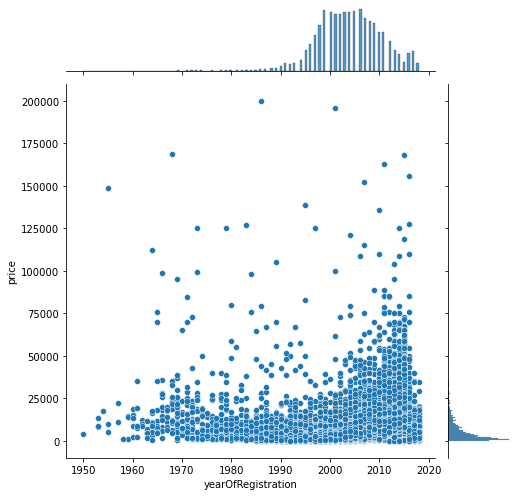

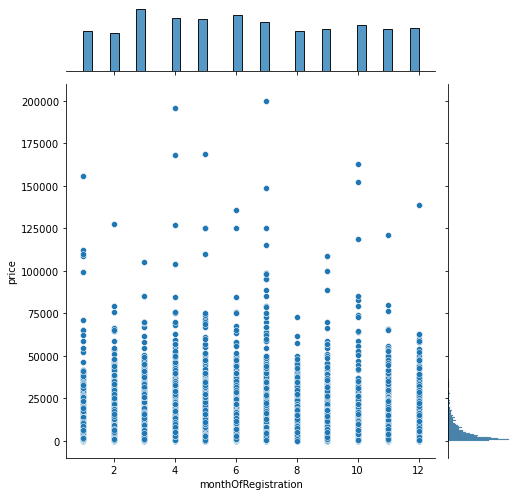

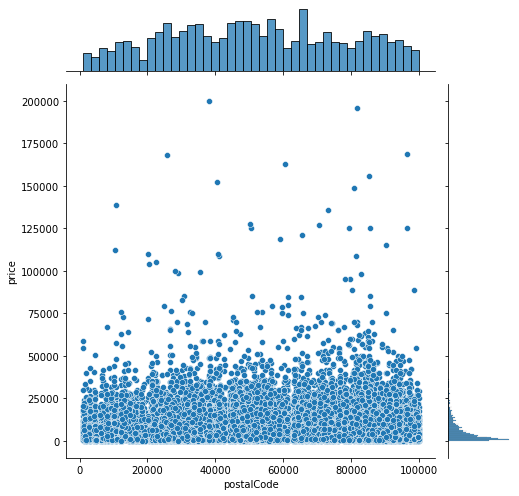

In [11]:
for i in ['yearOfRegistration', 'monthOfRegistration','postalCode']:
    sns.jointplot(x=i, y='price',data=df[[i,'price']],size=7)
    #df['price'].corr(df[i])

In [12]:
df.drop(['monthOfRegistration'],axis='columns',inplace=True)

### Feature Engineering - creating a new feature "ageOfCar" 

In [13]:
df['ageOfCar']=pd.DatetimeIndex(df['dateCreated']).year-df['yearOfRegistration']

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


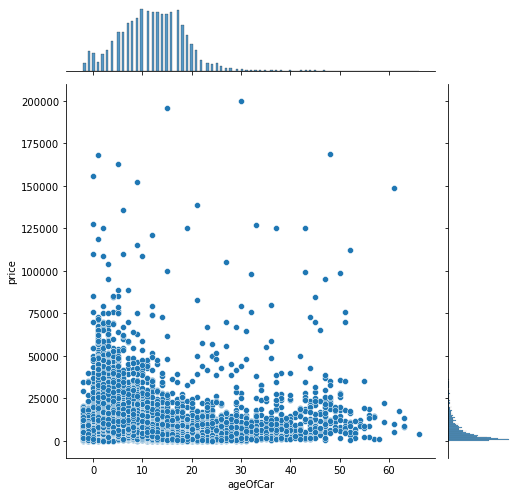

In [14]:
sns.jointplot(x='ageOfCar', y='price',data=df[['ageOfCar','price']],size=7)

In [15]:
df.drop(['yearOfRegistration','dateCreated'],axis='columns',inplace=True)

### Identifying outliers with boxplots

<AxesSubplot:xlabel='price'>

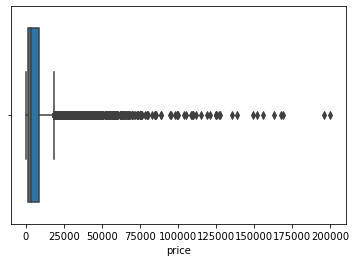

In [16]:
sns.boxplot(x=df['price'])

In [17]:
df[df.price>25000].count()

price                1292
abtest               1292
vehicleType          1292
gearbox              1292
powerPS              1292
model                1292
kilometer            1292
fuelType             1292
brand                1292
notRepairedDamage    1292
postalCode           1292
ageOfCar             1292
dtype: int64

<AxesSubplot:xlabel='ageOfCar'>

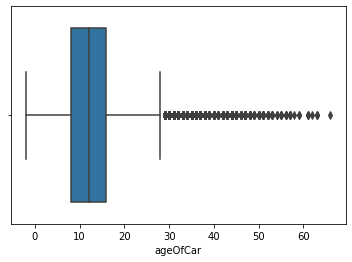

In [18]:
sns.boxplot(x=df['ageOfCar'])

In [19]:
df[(df.ageOfCar>30) | (df.ageOfCar<0)].count()

price                1656
abtest               1656
vehicleType          1656
gearbox              1656
powerPS              1656
model                1656
kilometer            1656
fuelType             1656
brand                1656
notRepairedDamage    1656
postalCode           1656
ageOfCar             1656
dtype: int64

<AxesSubplot:xlabel='powerPS'>

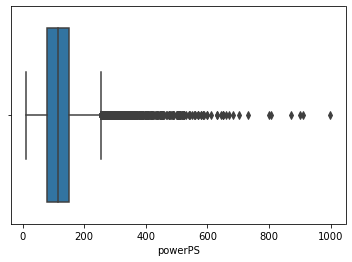

In [20]:
sns.boxplot(x=df['powerPS'])

In [21]:
df[df.powerPS>280].count()

price                1063
abtest               1063
vehicleType          1063
gearbox              1063
powerPS              1063
model                1063
kilometer            1063
fuelType             1063
brand                1063
notRepairedDamage    1063
postalCode           1063
ageOfCar             1063
dtype: int64

<AxesSubplot:xlabel='kilometer'>

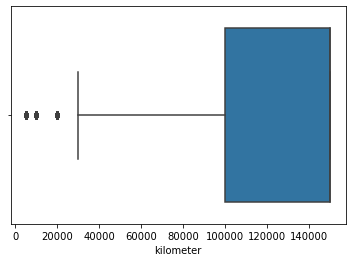

In [22]:
sns.boxplot(x=df['kilometer'])

In [23]:
df[df.kilometer<25000].count()

price                1277
abtest               1277
vehicleType          1277
gearbox              1277
powerPS              1277
model                1277
kilometer            1277
fuelType             1277
brand                1277
notRepairedDamage    1277
postalCode           1277
ageOfCar             1277
dtype: int64

In [24]:
df=df[(df.price<=25000) & (df.ageOfCar>=0) & (df.ageOfCar<=30) & (df.powerPS<=280) & (df.kilometer>=25000)]

In [25]:
df.describe()

,price,powerPS,kilometer,postalCode,ageOfCar
count,36244.000000,36244.000000,36244.000000,36244.000000,36244.000000
mean,5186.503145,120.283385,129749.199868,51519.525163,12.594664
std,5084.156881,48.451882,33502.785178,25766.465713,5.580795
min,100.000000,11.000000,30000.000000,1067.000000,0.000000
25%,1450.000000,80.000000,125000.000000,31167.000000,9.000000
50%,3300.000000,115.000000,150000.000000,50735.000000,13.000000
75%,7300.000000,150.000000,150000.000000,72294.750000,17.000000
max,25000.000000,280.000000,150000.000000,99998.000000,30.000000


### Encoding categorical variables

In [26]:
x=df.drop(['price'],axis='columns',inplace=False)
y=df['price']

#### Using Target Encoding for variables with more than 2 classes

In [27]:
from category_encoders import TargetEncoder

te=TargetEncoder(cols=['brand','model','vehicleType','fuelType','postalCode']).fit(x,y)
x=te.transform(x)

ModuleNotFoundError: No module named 'category_encoders'

#### Using Label Encoding for variables with 2 classes

In [ ]:
le1=LabelEncoder().fit(x['gearbox'])
x['gearbox'] =le1.transform(x['gearbox'])
le2=LabelEncoder().fit(x['notRepairedDamage'])
x['notRepairedDamage'] =le2.transform(x['notRepairedDamage'])
le3=LabelEncoder().fit(x['abtest'])
x['abtest']=le3.transform(x['abtest'])

### Developing a correlation heat map

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
x['price']=y
sns.heatmap(x.corr(),cmap=cmap,square=True,annot=True)

In [ ]:
x.corr().loc[:,'price'].abs().sort_values(ascending=False)

#### Removing poorly correlated "abtest" feature

In [ ]:
x.drop(['abtest'],axis='columns',inplace=True)
x.info()

In [ ]:
y=x['price']
x.drop(['price'],axis='columns',inplace=True)
feat=x.columns

### Standardization, spliting into training and validation set

In [ ]:
sc=StandardScaler()
x=sc.fit_transform(x)

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state = 42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

### Train and Test using XGBoost model

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param={'n_estimators':[10,20,50,100,150,200],
      'max_depth':range(3,11),
      'eta':[0.05,0.1,0.15,0.2,0.25,0.3]}

xgr=xgb.XGBRegressor()
gs=GridSearchCV(estimator=xgr,param_grid=param,scoring='neg_root_mean_squared_error',cv=5,verbose=3)
gs.fit(X_train,y_train)

In [ ]:
print(gs.best_params_)
print(gs.best_score_)

In [ ]:
#eta:0.05 max_depth: 7 n_estimators: 200
from sklearn.metrics import mean_squared_error

xgr=xgb.XGBRegressor(eta=0.05,max_depth=7,n_estimators=200)
xgr.fit(X_train,y_train)
pred=xgr.predict(X_val)
print('RMSE: ',mean_squared_error(y_val,pred,squared=False))
print('R2Score: ',xgr.score(X_val,y_val))

### Visualizing Residuals

In [ ]:
def residual_plot(y_test, y_pred):
    
    res =  y_test - y_pred
    fig, axs = plt.subplots(1,2,figsize=(30,10))
    std_res = res/np.std(res)
    axs[0].title.set_text('Scatter Plot of residuals')
    axs[0].set_xlabel('True Output')
    axs[0].set_ylabel('Residuals')
    axs[0].scatter(y_test,std_res)
    axs[1].title.set_text('Histogram of residuals')
    sns.distplot(std_res, ax = axs[1]);
    plt.show()

residual_plot(y_val,pred)

### Plot feature importance

In [ ]:
feature_important = xgr.feature_importances_
values = list(feature_important)

data = pd.DataFrame(data=values, index=feat, columns=["score"]).sort_values(by = "score")
ax=data.plot(kind='barh',title='Feature Importance',legend=None)
ax.set_xlabel('Importance value')
ax.set_ylabel('Features')
plt.show()

#xgb.plot_importance(xgr)
#plt.rcParams['figure.figsize'] = [7, 7]
#plt.show()
#print(feat)